<a href="https://colab.research.google.com/github/ShaunakSen/Deep-Learning/blob/master/DiveIntoDeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [125]:
!pip install -U d2l

Requirement already up-to-date: d2l in /usr/local/lib/python3.7/dist-packages (0.16.2)


## Dive Into Deep Learning

> Self notes on the book: http://www.d2l.ai/
---

If you are able to devise a solution to the problem that will work 100% of the time, __do not__ use ML!

The supervision comes into play because for choosing the parameters, we (the supervisors) provide the model with a dataset consisting of labeled examples, where each example is matched with the ground-truth label. In probabilistic terms, we typically are interested in estimating the conditional probability of a label given input features. While it is just one among several paradigms within machine learning, supervised learning accounts for the majority of successful applications of machine learning in industry. Partly, that is because many important tasks can be described crisply as estimating the probability of something unknown given a particular set of available data:

Lots of practical problems are well-described regression problems. Predicting the rating that a user will assign to a movie can be thought of as a regression problem and if you designed a great algorithm to accomplish this feat in 2009, you might have won the 1-million-dollar Netflix prize. Predicting the length of stay for patients in the hospital is also a regression problem. A good rule of thumb is that any how much? or how many? problem should suggest regression, such as:

- How many hours will this surgery take?

- How much rainfall will this town have in the next six hours?

NOTE: whole number prediction problems are regression ones, not classification

## Types of Supervised ML

### 1. Regression + 2. Classification - we know

### 2.1 Tagging

Some classification problems fit neatly into the binary or multiclass classification setups. For example, we could train a normal binary classifier to distinguish cats from dogs. Given the current state of computer vision, we can do this easily, with off-the-shelf tools. Nonetheless, no matter how accurate our model gets, we might find ourselves in trouble when the classifier encounters an image of the Town Musicians of Bremen, a popular German fairy tale featuring four animals in Fig. 1.3.3.

![](http://www.d2l.ai/_images/stackedanimals.png)

As you can see, there is a cat in Fig. 1.3.3, and a rooster, a dog, and a donkey, with some trees in the background. Depending on what we want to do with our model ultimately, treating this as a binary classification problem might not make a lot of sense. Instead, we might want to give the model the option of saying the image depicts a cat, a dog, a donkey, and a rooster.

The problem of learning to predict classes that are not mutually exclusive is called multi-label classification. Auto-tagging problems are typically best described as multi-label classification problems. Think of the tags people might apply to posts on a technical blog, e.g., “machine learning”, “technology”, “gadgets”, “programming languages”, “Linux”, “cloud computing”, “AWS”. A typical article might have 5–10 tags applied because these concepts are correlated. Posts about “cloud computing” are likely to mention “AWS” and posts about “machine learning” could also deal with “programming languages”.

We also have to deal with this kind of problem when dealing with the biomedical literature, where correctly tagging articles is important because it allows researchers to do exhaustive reviews of the literature. At the National Library of Medicine, a number of professional annotators go over each article that gets indexed in PubMed to associate it with the relevant terms from MeSH, a collection of roughly 28000 tags. This is a time-consuming process and the annotators typically have a one-year lag between archiving and tagging. Machine learning can be used here to provide provisional tags until each article can have a proper manual review. Indeed, for several years, the BioASQ organization has hosted competitions to do precisely this.

### 3. Search

Sometimes we do not just want to assign each example to a bucket or to a real value. In the field of information retrieval, we want to impose a ranking on a set of items. Take web search for an example. The goal is less to determine whether a particular page is relevant for a query, but rather, which one of the plethora of search results is most relevant for a particular user. We really care about the ordering of the relevant search results and our learning algorithm needs to produce ordered subsets of elements from a larger set. In other words, if we are asked to produce the first 5 letters from the alphabet, there is a difference between returning “A B C D E” and “C A B E D”. Even if the result set is the same, the ordering within the set matters.


One possible solution to this problem is to first assign to every element in the set a corresponding relevance score and then to retrieve the top-rated elements. PageRank, the original secret sauce behind the Google search engine was an early example of such a scoring system but it was peculiar in that it did not depend on the actual query. Here they relied on a simple relevance filter to identify the set of relevant items and then on PageRank to order those results that contained the query term. Nowadays, search engines use machine learning and behavioral models to obtain query-dependent relevance scores. There are entire academic conferences devoted to this subject.

### 4. Recommender Systems

In the simplest formulations, these systems are trained to estimate some score, such as an estimated rating or the probability of purchase, given a user and an item.

Given such a model, for any given user, we could retrieve the set of objects with the largest scores, which could then be recommended to the user. Production systems are considerably more advanced and take detailed user activity and item characteristics into account when computing such scores

Despite their tremendous economic value, recommendation systems naively built on top of predictive models suffer some serious conceptual flaws. To start, we only observe censored feedback: users preferentially rate movies that they feel strongly about. For example, on a five-point scale, you might notice that items receive many five and one star ratings but that there are conspicuously few three-star ratings. Moreover, current purchase habits are often a result of the recommendation algorithm currently in place, but learning algorithms do not always take this detail into account. Thus it is possible for feedback loops to form where a recommender system preferentially pushes an item that is then taken to be better (due to greater purchases) and in turn is recommended even more frequently. Many of these problems about how to deal with censoring, incentives, and feedback loops, are important open research questions.

### Sequence learning

So far, we have looked at problems where we have some fixed number of inputs and produce a fixed number of outputs. For example, we considered predicting house prices from a fixed set of features: square footage, number of bedrooms, number of bathrooms, walking time to downtown. We also discussed mapping from an image (of fixed dimension) to the predicted probabilities that it belongs to each of a fixed number of classes, or taking a user ID and a product ID, and predicting a star rating. In these cases, once we feed our fixed-length input into the model to generate an output, the model immediately forgets what it just saw.

This might be fine if our inputs truly all have the same dimensions and if successive inputs truly have nothing to do with each other. But how would we deal with video snippets? In this case, each snippet might consist of a different number of frames. And our guess of what is going on in each frame might be much stronger if we take into account the previous or succeeding frames. Same goes for language. One popular deep learning problem is machine translation: the task of ingesting sentences in some source language and predicting their translation in another language.

These problems also occur in medicine. We might want a model to monitor patients in the intensive care unit and to fire off alerts if their risk of death in the next 24 hours exceeds some threshold. We definitely would not want this model to throw away everything it knows about the patient history each hour and just make its predictions based on the most recent measurements.

These problems are among the most exciting applications of machine learning and they are instances of sequence learning. They require a model to either ingest sequences of inputs or to emit sequences of outputs (or both). Specifically, sequence to sequence learning considers problems where input and output are both variable-length sequences, such as machine translation and transcribing text from the spoken speech. While it is impossible to consider all types of sequence transformations, the following special cases are worth mentioning.

__Tagging and Parsing__. This involves annotating a text sequence with attributes. In other words, the number of inputs and outputs is essentially the same. For instance, we might want to know where the verbs and subjects are. Alternatively, we might want to know which words are the named entities.

__Automatic Speech Recognition__. With speech recognition, the input sequence is an audio recording of a speaker (shown in Fig. 1.3.5), and the output is the textual transcript of what the speaker said. The challenge is that there are many more audio frames (sound is typically sampled at 8kHz or 16kHz) than text, i.e., there is no 1:1 correspondence between audio and text, since thousands of samples may correspond to a single spoken word. These are sequence to sequence learning problems where the output is much shorter than the input.

__Text to Speech__. This is the inverse of automatic speech recognition. In other words, the input is text and the output is an audio file. In this case, the output is much longer than the input. While it is easy for humans to recognize a bad audio file, this is not quite so trivial for computers.

__Machine Translation__. Unlike the case of speech recognition, where corresponding inputs and outputs occur in the same order (after alignment), in machine translation, order inversion can be vital. In other words, while we are still converting one sequence into another, neither the number of inputs and outputs nor the order of corresponding data examples are assumed to be the same. Consider the following illustrative example of the peculiar tendency of Germans to place the verbs at the end of sentences.

```
German:           Haben Sie sich schon dieses grossartige Lehrwerk angeschaut?
English:          Did you already check out this excellent tutorial?
Wrong alignment:  Did you yourself already this excellent tutorial looked-at?
```



## Unsupervised Learning

In a completely opposite way, it could be frustrating to work for a boss who has no idea what they want you to do. However, if you plan to be a data scientist, you had better get used to it. The boss might just hand you a giant dump of data and tell you to do some data science with it! This sounds vague because it is. We call this class of problems unsupervised learning, and the type and number of questions we could ask is limited only by our creativity. We will address unsupervised learning techniques in later chapters. To whet your appetite for now, we describe a few of the following questions you might ask.

- Can we find a small number of prototypes that accurately summarize the data? Given a set of photos, can we group them into landscape photos, pictures of dogs, babies, cats, and mountain peaks? Likewise, given a collection of users’ browsing activities, can we group them into users with similar behavior? This problem is typically known as clustering.

- Can we find a small number of parameters that accurately capture the relevant properties of the data? The trajectories of a ball are quite well described by velocity, diameter, and mass of the ball. Tailors have developed a small number of parameters that describe human body shape fairly accurately for the purpose of fitting clothes. These problems are referred to as subspace estimation. If the dependence is linear, it is called principal component analysis.

- Is there a representation of (arbitrarily structured) objects in Euclidean space such that symbolic properties can be well matched? This can be used to describe entities and their relations, such as “Rome”  −  “Italy”  +  “France”  =  “Paris”.

- Is there a description of the root causes of much of the data that we observe? For instance, if we have demographic data about house prices, pollution, crime, location, education, and salaries, can we discover how they are related simply based on empirical data? The fields concerned with causality and probabilistic graphical models address this problem.

- Another important and exciting recent development in unsupervised learning is the advent of generative adversarial networks. These give us a procedural way to synthesize data, even complicated structured data like images and audio. The underlying statistical mechanisms are tests to check whether real and fake data are the same.

## Basic Data Manipulation

To start, we can use arange to create a row vector x containing the first 12 integers starting with 0, though they are created as floats by default. Each of the values in a tensor is called an element of the tensor. For instance, there are 12 elements in the tensor x. Unless otherwise specified, a new tensor will be stored in main memory and designated for CPU-based computation.



In [126]:
import torch
import tensorflow as tf

print (tf.__version__)
print (torch.__version__)

2.4.1
1.8.0+cu101


In [127]:
x = torch.arange(start=0, end=12, step=1)

print (x)

print (x.shape)

print (x.numel())

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
torch.Size([12])
12


In [128]:
X = x.reshape(3, 4)
print (X)

## automatically infer the first dimension
X = x.reshape(-1, 4)
print (X) 

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


Typically, we will want our matrices initialized either with zeros, ones, some other constants, or numbers randomly sampled from a specific distribution. We can create a tensor representing a tensor with all elements set to 0 and a shape of (2, 3, 4) as follows:



In [129]:
print (torch.zeros((2,3,4)))

## Similarly, we can create tensors with each element set to 1 as follows:

print (torch.ones((2,3,4)))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])
tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])


In [130]:
print (torch.randn((2,3,4)))

tensor([[[-0.4086,  1.0455, -0.3413, -1.2693],
         [ 1.7627, -0.1072, -0.1333, -0.0339],
         [ 1.0724, -0.8166, -0.0079,  1.3829]],

        [[ 0.8176, -0.7435, -0.0835,  0.5165],
         [-1.6966,  0.0709, -1.9169,  0.6659],
         [ 0.7021, -0.2100,  0.3272, -0.2835]]])


We can also specify the exact values for each element in the desired tensor by supplying a Python list (or list of lists) containing the numerical values. Here, the outermost list corresponds to axis 0, and the inner list to axis 1.



In [131]:
torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

In [132]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x + y, x - y, x * y, x / y, x ** y  # The ** operator is exponentiation

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [133]:
X = torch.arange(12, dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

print (X)

print (Y)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])
tensor([[2., 1., 4., 3.],
        [1., 2., 3., 4.],
        [4., 3., 2., 1.]])


In [134]:
torch.cat(tensors=[X, Y], dim=0)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [ 2.,  1.,  4.,  3.],
        [ 1.,  2.,  3.,  4.],
        [ 4.,  3.,  2.,  1.]])

In [135]:
torch.cat((X, Y), dim=1)

tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
        [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
        [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]])

### Broadcasting Mechanism

In the above section, we saw how to perform elementwise operations on two tensors of the same shape. Under certain conditions, even when shapes differ, we can still perform elementwise operations by invoking the broadcasting mechanism. This mechanism works in the following way: First, expand one or both arrays by copying elements appropriately so that after this transformation, the two tensors have the same shape. Second, carry out the elementwise operations on the resulting arrays.

In most cases, we broadcast along an axis where an array initially only has length 1, such as in the following example:



In [136]:
a = torch.arange(3).reshape((3,1))
print (a)
b = torch.arange(2).reshape((1, 2))
print (b)

tensor([[0],
        [1],
        [2]])
tensor([[0, 1]])


In [137]:
a+b

"""
The broadcasting happens as:
a -> [[0, 0]
     [1, 1]
     [2, 2]]
b -> [[0, 1]
     [0, 1]
     [0, 1]]   
"""

'\nThe broadcasting happens as:\na -> [[0, 0]\n     [1, 1]\n     [2, 2]]\nb -> [[0, 1]\n     [0, 1]\n     [0, 1]]   \n'

### Indexing and slicing

Thus, [-1] selects the last element and [1:3] selects the second and the third elements as follows:



In [138]:
print (X)

print (X[-1])

print (X[1:3])

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])
tensor([ 8.,  9., 10., 11.])
tensor([[ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])


In [139]:
X[1, 2] = 9
print (X)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  9.,  7.],
        [ 8.,  9., 10., 11.]])


In [140]:
X[0:2, :] = 12

print (X)

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])


### Saving memeory

Running operations can cause new memory to be allocated to host results. For example, if we write Y = X + Y, we will dereference the tensor that Y used to point to and instead point Y at the newly allocated memory. In the following example, we demonstrate this with Python’s id() function, which gives us the exact address of the referenced object in memory. After running Y = Y + X, we will find that id(Y) points to a different location. That is because Python first evaluates Y + X, allocating new memory for the result and then makes Y point to this new location in memory.



In [141]:
before = id(Y)
print (before)
Y=Y+X
print (id(Y))

139871159536528
139871159354064


This might be undesirable for two reasons. First, we do not want to run around allocating memory unnecessarily all the time. In machine learning, we might have hundreds of megabytes of parameters and update all of them multiple times per second. Typically, we will want to perform these updates in place. Second, we might point at the same parameters from multiple variables. If we do not update in place, other references will still point to the old memory location, making it possible for parts of our code to inadvertently reference stale parameters.

Fortunately, performing in-place operations is easy. We can assign the result of an operation to a previously allocated array with slice notation, e.g., Y[:] = <expression>. To illustrate this concept, we first create a new matrix Z with the same shape as another Y, using zeros_like to allocate a block of entries

In [142]:
Z = torch.zeros_like(Y)
print (Z)
print('id(Z):', id(Z))
Z[:] = X + Y
print('id(Z):', id(Z))
Z = X+Y
print('id(Z):', id(Z))

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
id(Z): 139871160388896
id(Z): 139871160388896
id(Z): 139871283454752


If the value of X is not reused in subsequent computations, we can also use X[:] = X + Y or X += Y to reduce the memory overhead of the operation.



In [143]:
before = id(X)
X = X + Y
id(X) == before

False

In [144]:
before = id(X)
X +=  Y
id(X) == before

True

## Basic Linear Algebra

### Dot Product

one of the most fundamental operations is the dot product. Given two vectors  x,y their dot product

$\mathbf{x}^\top \mathbf{y}$ or $\langle \mathbf{x}, \mathbf{y} \rangle$
is a sum over the products of the elements at the same position

In [145]:
print (x)
y = torch.ones(4, dtype=torch.float32)

print (x.dot(y))

### Note that we can express the dot product of two vectors equivalently by performing an elementwise multiplication and then a sum:

print (torch.sum(x*y))

tensor([1., 2., 4., 8.])
tensor(15.)
tensor(15.)


Dot products are useful in a wide range of contexts. For example, given some set of values, and a set of wts the dot product bw these vectors give us a weighted sum. When the wts are non-negative and sum upto 1 the dot prod gives us the weighted avg

After normalizing two vectors to have the unit length, the dot products express the cosine of the angle between them. We will formally introduce this notion of length later in this section.

### Matrix-Vector Products

Now that we know how to calculate dot products, we can begin to understand matrix-vector products. Recall the matrix  $\mathbf{A} \in \mathbb{R}^{m \times n}$ and the vector $\mathbf{x} \in \mathbb{R}^n$ 

$\begin{split}\mathbf{A}=
\begin{bmatrix}
\mathbf{a}^\top_{1} \\
\mathbf{a}^\top_{2} \\
\vdots \\
\mathbf{a}^\top_m \\
\end{bmatrix},\end{split}$

where each $\mathbf{a}^\top_{i} \in \mathbb{R}^n$ is a row vector representing the ith row of the matrix A. The matrix-vector product Ax is simply a column vector of length  m , whose  ith  element is the dot product  $\mathbf{a}^\top_i \mathbf{x}$

$\begin{split}\mathbf{A}\mathbf{x}
= \begin{bmatrix}
\mathbf{a}^\top_{1} \\
\mathbf{a}^\top_{2} \\
\vdots \\
\mathbf{a}^\top_m \\
\end{bmatrix}\mathbf{x}
= \begin{bmatrix}
 \mathbf{a}^\top_{1} \mathbf{x}  \\
 \mathbf{a}^\top_{2} \mathbf{x} \\
\vdots\\
 \mathbf{a}^\top_{m} \mathbf{x}\\
\end{bmatrix}.\end{split}$

We can think of multiplication by a matrix  A as a transformation that projects vectors (here x) from  $\mathbb{R}^n$ to $\mathbb{R}^m$. These transformations turn out to be remarkably useful. For example, we can represent rotations as multiplications by a square matrix. As we will see in subsequent chapters, we can also use matrix-vector products to describe the most intensive calculations required when computing each layer in a neural network given the values of the previous layer.

Expressing matrix-vector products in code with tensors, we use the same dot function as for dot products. When we call np.dot(A, x) with a matrix A and a vector x, the matrix-vector product is performed. Note that the column dimension of A (its length along axis 1) must be the same as the dimension of x (its length).



In [146]:
A = torch.arange(20, dtype=torch.float32).reshape(5, 4)


print (A.shape, x.shape)

print (A)

print (x)

print (torch.mv(input=A, vec=x))

torch.Size([5, 4]) torch.Size([4])
tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])
tensor([1., 2., 4., 8.])
tensor([ 34.,  94., 154., 214., 274.])


### Matrix Multiplication

![](https://i.imgur.com/8lGoukC.png)

#### Walkthrough

![](https://i.imgur.com/YPiBqU8.jpeg)

![](https://i.imgur.com/YPiBqU8.jpeg)


---






In [147]:
print (A)

B = torch.ones((4,3))

print (A.shape, B.shape)
mul = torch.mm(A, B)
print (mul)
print (mul.shape)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])
torch.Size([5, 4]) torch.Size([4, 3])
tensor([[ 6.,  6.,  6.],
        [22., 22., 22.],
        [38., 38., 38.],
        [54., 54., 54.],
        [70., 70., 70.]])
torch.Size([5, 3])


In [148]:
### a is each row vector; extract the one at idx 1
a_2 = A[1, :]

print (a_2)

tensor([4., 5., 6., 7.])


In [149]:
### b is each col vector; extract the last one: b_m
b_m = B[:, -1]

print (b_m)

tensor([1., 1., 1., 1.])


In [150]:
### a2_T . b_m should give the result at pos 2, m

print (a_2.T.dot(b_m))

tensor(22.)


In [151]:
print (mul)

tensor([[ 6.,  6.,  6.],
        [22., 22., 22.],
        [38., 38., 38.],
        [54., 54., 54.],
        [70., 70., 70.]])


### Norms

Some of the most useful operators in linear algebra are norms. Informally, the norm of a vector tells us how big a vector is. The notion of size under consideration here concerns not dimensionality but rather the magnitude of the components.

You might notice that norms sound a lot like measures of distance. And if you remember Euclidean distances (think Pythagoras’ theorem) from grade school, then the concepts of non-negativity and the triangle inequality might ring a bell. In fact, the Euclidean distance is a norm:

specifically it is the  L2  norm. Suppose that the elements in the  n -dimensional vector  x  are  x1,…,xn . The  L2  norm of  x  is the square root of the sum of the squares of the vector elements:

$\|\mathbf{x}\|_2 = \sqrt{\sum_{i=1}^n x_i^2},$

where the subscript  2  is often omitted in  L2  norms, i.e., $\|\mathbf{x}\|$ is  equivalent to $\|\mathbf{x}\|_2$ 

In [152]:
u = torch.tensor([3.0, -4.0])
torch.norm(u)

tensor(5.)

In deep learning, we work more often with the squared  L2  norm. You will also frequently encounter the  L1  norm, which is expressed as the sum of the absolute values of the vector elements:

$\|\mathbf{x}\|_1 = \sum_{i=1}^n \left|x_i \right|.$

As compared with the  L2  norm, it is less influenced by outliers. To calculate the  L1  norm, we compose the absolute value function with a sum over the elements.

In [153]:
torch.abs(u).sum()

tensor(7.)

Both the  L2  norm and the  L1  norm are special cases of the more general  Lp  norm:

$\|\mathbf{x}\|_p = \left(\sum_{i=1}^n \left|x_i \right|^p \right)^{1/p}.|$

Analogous to  L2  norms of vectors, the Frobenius norm of a matrix $\mathbf{X} \in \mathbb{R}^{m \times n}$ is the square root of the sum of the squares of the matrix elements:

$\|\mathbf{X}\|_F = \sqrt{\sum_{i=1}^m \sum_{j=1}^n x_{ij}^2}.$

The Frobenius norm satisfies all the properties of vector norms. It behaves as if it were an  L2  norm of a matrix-shaped vector. Invoking the following function will calculate the Frobenius norm of a matrix.

In [154]:
print (A)
torch.norm(A)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])


tensor(49.6991)

While we do not want to get too far ahead of ourselves, we can plant some intuition already about why these concepts are useful. In deep learning, we are often trying to solve optimization problems: maximize the probability assigned to observed data; minimize the distance between predictions and the ground-truth observations. Assign vector representations to items (like words, products, or news articles) such that the distance between similar items is minimized, and the distance between dissimilar items is maximized. Oftentimes, the objectives, perhaps the most important components of deep learning algorithms (besides the data), are expressed as norms.

### Exercises

6. Run A / A.sum(axis=1) and see what happens. Can you analyze the reason?



In [155]:
print (A)

print (A.shape)

print (A.sum(axis=1))

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])
torch.Size([5, 4])
tensor([ 6., 22., 38., 54., 70.])


In [156]:
A.size(), A.sum(axis=1).size()

(torch.Size([5, 4]), torch.Size([5]))

In [157]:
## A/A.sum(axis=1) -> error

This will be fine:

In [158]:
B = torch.arange(25, dtype = torch.float32).reshape(5, 5)
print (B)
print (B.sum(axis=1))
B / B.sum(axis=1)

tensor([[ 0.,  1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.,  9.],
        [10., 11., 12., 13., 14.],
        [15., 16., 17., 18., 19.],
        [20., 21., 22., 23., 24.]])
tensor([ 10.,  35.,  60.,  85., 110.])


tensor([[0.0000, 0.0286, 0.0333, 0.0353, 0.0364],
        [0.5000, 0.1714, 0.1167, 0.0941, 0.0818],
        [1.0000, 0.3143, 0.2000, 0.1529, 0.1273],
        [1.5000, 0.4571, 0.2833, 0.2118, 0.1727],
        [2.0000, 0.6000, 0.3667, 0.2706, 0.2182]])

8. Consider a tensor with shape (2, 3, 4). What are the shapes of the summation outputs along axis 0, 1, and 2?



In [159]:
a = torch.randint(low=0, high=9, size=(2,3,4))
a

tensor([[[6, 6, 0, 5],
         [8, 8, 2, 1],
         [1, 2, 8, 7]],

        [[2, 0, 4, 5],
         [7, 6, 8, 8],
         [0, 7, 8, 1]]])

In [160]:
print (a.shape)

print (a.sum(axis=0))

torch.Size([2, 3, 4])
tensor([[ 8,  6,  4, 10],
        [15, 14, 10,  9],
        [ 1,  9, 16,  8]])


In [161]:
### shape of a is (2,3,4) i.e 2 separate 3x4 matrics
a[0], a[1]

(tensor([[6, 6, 0, 5],
         [8, 8, 2, 1],
         [1, 2, 8, 7]]), tensor([[2, 0, 4, 5],
         [7, 6, 8, 8],
         [0, 7, 8, 1]]))

In [162]:
## a.sum(axis=0) will sum up the 2 3x4 matrices resulting in a 3x4 matrix
a.sum(axis=0).shape

torch.Size([3, 4])

In [163]:
a[0]+a[1]

tensor([[ 8,  6,  4, 10],
        [15, 14, 10,  9],
        [ 1,  9, 16,  8]])

In [164]:
a.sum(axis=0)

tensor([[ 8,  6,  4, 10],
        [15, 14, 10,  9],
        [ 1,  9, 16,  8]])

In [165]:
a.sum(axis=1).shape

torch.Size([2, 4])

In [166]:
a

tensor([[[6, 6, 0, 5],
         [8, 8, 2, 1],
         [1, 2, 8, 7]],

        [[2, 0, 4, 5],
         [7, 6, 8, 8],
         [0, 7, 8, 1]]])

In [167]:
### 2x4 shape: 2 rows for 2 matrices; 4 elems each for the sum of each matrix along the columns
a.sum(axis=1)

tensor([[15, 16, 10, 13],
        [ 9, 13, 20, 14]])

In [168]:
a.sum(axis=2)

tensor([[17, 19, 18],
        [11, 29, 16]])

In [169]:
### 2x3 shape: 2 rows for 2 matrices; 3 elems each for the sum of each matrix along the rows

a.sum(axis=2).shape

torch.Size([2, 3])

9. Feed a tensor with 3 or more axes to the linalg.norm function and observe its output. What does this function compute for tensors of arbitrary shape?



In [170]:
Y= torch.arange(24,dtype = torch.float32).reshape(2, 3, 4)
print (Y)

tensor([[[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]],

        [[12., 13., 14., 15.],
         [16., 17., 18., 19.],
         [20., 21., 22., 23.]]])


In [171]:
torch.linalg.norm(Y)

tensor(65.7571)

Analogous to  L2  norms of vectors, the Frobenius norm of a matrix $\mathbf{X} \in \mathbb{R}^{m \times n}$ is the square root of the sum of the squares of the matrix elements:

$\|\mathbf{X}\|_F = \sqrt{\sum_{i=1}^m \sum_{j=1}^n x_{ij}^2}.$


In [172]:
sum = 0
for elem in Y[:]:
    print (elem.shape)
    for elem1 in elem:
        for elem2 in elem1:
            sum+= elem2.item()**2

print(sum**0.5)

torch.Size([3, 4])
torch.Size([3, 4])
65.75712889109438


This has computed the Frobenus norm for the tensor of shape 2x3x4

## Calculus

### Derivatives and Differentiation

We begin by addressing the calculation of derivatives, a crucial step in nearly all deep learning optimization algorithms. In deep learning, we typically choose loss functions that are differentiable with respect to our model’s parameters. Put simply, this means that for each parameter, we can determine how rapidly the loss would increase or decrease, were we to increase or decrease that parameter by an infinitesimally small amount.

Suppose that we have a function  $f: \mathbb{R} \rightarrow \mathbb{R}$ whose input and output are both scalars. The derivative of  f  is defined as

$f'(x) = \lim_{h \rightarrow 0} \frac{f(x+h) - f(x)}{h},$

if this limit exists. If  f'(a) exists,  f  is said to be differentiable at a . If  f  is differentiable at every number of an interval, then this function is differentiable on this interval. We can interpret the derivative  f′(x)  in (2.4.1) as the instantaneous rate of change of  f(x)  with respect to  x . The so-called instantaneous rate of change is based on the variation  h  in  x , which approaches  0 .

To illustrate derivatives, let us experiment with an example. Define  
$u = f(x) = 3x^2-4x$


In [173]:
%matplotlib inline
import numpy as np
from IPython import display

def f(x):
    return 3 * x ** 2 - 4 * x

In [174]:
def numerical_lim(f, x, h):
    return (f(x+h) - f(x))/h

h = 0.1
for i in range(10):
    print (f'h = {h}, numerical limit = {numerical_lim(f, 1, h)}')
    h *= 0.1

h = 0.1, numerical limit = 2.3000000000000043
h = 0.010000000000000002, numerical limit = 2.029999999999976
h = 0.0010000000000000002, numerical limit = 2.0029999999993104
h = 0.00010000000000000003, numerical limit = 2.000299999997956
h = 1.0000000000000004e-05, numerical limit = 2.0000300000155837
h = 1.0000000000000004e-06, numerical limit = 2.0000030001021676
h = 1.0000000000000005e-07, numerical limit = 2.000000298707504
h = 1.0000000000000005e-08, numerical limit = 1.999999987845057
h = 1.0000000000000005e-09, numerical limit = 2.000000165480741
h = 1.0000000000000006e-10, numerical limit = 2.000000165480741


Let us familiarize ourselves with a few equivalent notations for derivatives. Given  y=f(x) , where  x  and  y  are the independent variable and the dependent variable of the function  f , respectively. The following expressions are equivalent:

$f'(x) = y' = \frac{dy}{dx} = \frac{df}{dx} = \frac{d}{dx} f(x) = Df(x) = D_x f(x),$

### Partial Derivatives

So far we have dealt with the differentiation of functions of just one variable. In deep learning, functions often depend on many variables. Thus, we need to extend the ideas of differentiation to these multivariate functions.

Let $y = f(x_1, x_2, \ldots, x_n)$ be a function with  n  variables. The partial derivative of  y  with respect to its  ith  parameter  xi  is:

$\frac{\partial y}{\partial x_i} = \lim_{h \rightarrow 0} \frac{f(x_1, \ldots, x_{i-1}, x_i+h, x_{i+1}, \ldots, x_n) - f(x_1, \ldots, x_i, \ldots, x_n)}{h}.$

To calculate  $\frac{\partial y}{\partial x_i}$ we can simply treat $x_1, \ldots, x_{i-1}, x_{i+1}, \ldots, x_n$ s constants and calculate the derivative of  y  with respect to  xi . For notation of partial derivatives, the following are equivalent:

$\frac{\partial y}{\partial x_i} = \frac{\partial f}{\partial x_i} = f_{x_i} = f_i = D_i f = D_{x_i} f.$

### Gradients

Suppose that the input of function $f: \mathbb{R}^n \rightarrow \mathbb{R}$ is an  n -dimensional vector $\mathbf{x} = [x_1, x_2, \ldots, x_n]^\top$ and the output is a scalar. The gradient of the function  $f(\mathbf{x})$  with respect to  $\mathbf{x}$  is a vector of  n  partial derivatives:

$\nabla_{\mathbf{x}} f(\mathbf{x}) = \bigg[\frac{\partial f(\mathbf{x})}{\partial x_1}, \frac{\partial f(\mathbf{x})}{\partial x_2}, \ldots, \frac{\partial f(\mathbf{x})}{\partial x_n}\bigg]^\top,$

Note that this also returns an n-dimensional vector

where $\nabla_{\mathbf{x}} f(\mathbf{x})$ is often replaced by $\nabla f(\mathbf{x})$  when there is no ambiguity.

![](https://i.imgur.com/2qsZFkH.png)

### Chain Rule

However, such gradients can be hard to find. This is because multivariate functions in deep learning are often composite, so we may not apply any of the aforementioned rules to differentiate these functions. Fortunately, the chain rule enables us to differentiate composite functions.

Let us first consider functions of a single variable. Suppose that functions y = f(u) and u = g(x) are both differentiable, then the chain rule states that

$\frac{dy}{dx} = \frac{dy}{du} \frac{du}{dx}.$

Now let us turn our attention to a more general scenario where functions have an arbitrary number of variables. Suppose that the differentiable function  y  has variables u1, u2... um,  where each differentiable function  ui  has variables  x1,x2,…,xn . Note that  y  is a function of  x1,x2,…,xn . Then the chain rule gives

$\frac{dy}{dx_i} = \frac{dy}{du_1} \frac{du_1}{dx_i} + \frac{dy}{du_2} \frac{du_2}{dx_i} + \cdots + \frac{dy}{du_m} \frac{du_m}{dx_i}$



### Automatic Differentiation

As we have explained in Section 2.4, differentiation is a crucial step in nearly all deep learning optimization algorithms. While the calculations for taking these derivatives are straightforward, requiring only some basic calculus, for complex models, working out the updates by hand can be a pain (and often error-prone).

Deep learning frameworks expedite this work by automatically calculating derivatives, i.e., automatic differentiation. In practice, based on our designed model the system builds a computational graph, tracking which data combined through which operations to produce the output. Automatic differentiation enables the system to subsequently backpropagate gradients. Here, backpropagate simply means to trace through the computational graph, filling in the partial derivatives with respect to each parameter.

As a toy example, say that we are interested in differentiating the function $y = 2\mathbf{x}^{\top}\mathbf{x}$ with respect to the column vector  x . To start, let us create the variable x and assign it an initial value.

In [175]:
x = torch.arange(4.0)
print (x.shape)
x

torch.Size([4])


tensor([0., 1., 2., 3.])

The shape of x is 4x1. 2 x^T x will be a scalar. Also we know that a gradient of a scalar-valued function with respect to a vector  x  is itself vector-valued and has the same shape as  x .

Suppose that the input of function $f: \mathbb{R}^n \rightarrow \mathbb{R}$ is an  n -dimensional vector $\mathbf{x} = [x_1, x_2, \ldots, x_n]^\top$ and the output is a scalar. The gradient of the function  $f(\mathbf{x})$  with respect to  $\mathbf{x}$  is a vector of  n  partial derivatives:

$\nabla_{\mathbf{x}} f(\mathbf{x}) = \bigg[\frac{\partial f(\mathbf{x})}{\partial x_1}, \frac{\partial f(\mathbf{x})}{\partial x_2}, \ldots, \frac{\partial f(\mathbf{x})}{\partial x_n}\bigg]^\top,$

Before we even calculate the gradient of  y  with respect to  x , we will need a place to store it. It is important that we do not allocate new memory every time we take a derivative with respect to a parameter because we will often update the same parameters thousands or millions of times and could quickly run out of memory

In [176]:
x.requires_grad_(True)  # Same as `x = torch.arange(4.0, requires_grad=True)` ### This means we want to calculate grad wrt x
x.grad  # The default value is None

Now let us calculate  y . Note: y here is a scalar

In [177]:
y = 2*torch.dot(x, x) ## 2 (0.0 + 1.1 + 2.2 + 3.3)
print (x)
print (y)

tensor([0., 1., 2., 3.], requires_grad=True)
tensor(28., grad_fn=<MulBackward0>)


Since x is a vector of length 4, an inner product of x and x is performed, yielding the scalar output that we assign to y. Next, we can automatically calculate the gradient of y with respect to each component of x by calling the function for backpropagation and printing the gradient.



In [178]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

The gradient of the function  $y = 2\mathbf{x}^{\top}\mathbf{x}$  with respect to $\mathbf{x}$ will be $4\mathbf{x}$.  Let us quickly verify that our desired gradient was calculated correctly.

In [179]:
4*x

tensor([ 0.,  4.,  8., 12.], grad_fn=<MulBackward0>)

Now let us calculate another function of x.



In [180]:
# PyTorch accumulates the gradient in default, we need to clear the previous values
x.grad.zero_()

tensor([0., 0., 0., 0.])

In [181]:
y = x.sum()
print (y)

tensor(6., grad_fn=<SumBackward0>)


In [182]:
y.backward()
x.grad

tensor([1., 1., 1., 1.])

y = x1 + x2 + x3 + x4 where x1, x2, x3, x4 are each elem of vector x

dy/dx = [dy/dx1, dy/dx2, dy/dx3, dy/dx4]: Note each of these are the partial derivatives



### Backward for Non-Scalar Variables

Technically, when y is not a scalar, the most natural interpretation of the differentiation of a vector y with respect to a vector x is a matrix. For higher-order and higher-dimensional y and x, the differentiation result could be a high-order tensor.

However, while these more exotic objects do show up in advanced machine learning (including in deep learning), more often when we are calling backward on a vector, we are trying to calculate the derivatives of the loss functions for each constituent of a batch of training examples. Here, our intent is not to calculate the differentiation matrix but rather the sum of the partial derivatives computed individually for each example in the batch.

In [183]:
x.grad.zero_()
y = x * x

In [184]:
print (x)
print (y)

tensor([0., 1., 2., 3.], requires_grad=True)
tensor([0., 1., 4., 9.], grad_fn=<MulBackward0>)


In [185]:
print (y.sum())

tensor(14., grad_fn=<SumBackward0>)


In [186]:
y.sum().backward()

In [187]:
x.grad

tensor([0., 2., 4., 6.])

Here again y is basically y = x1^2 + x2^2 + x3^2 + x4^2

so dy/dx = [dy/dx1, dy/dx2, dy/dx3, dy/dx4]: Note each of these are the partial derivatives = [2x1, 2x2, 2x3, 2x4]

### Detaching Computation

Sometimes, we wish to move some calculations outside of the recorded computational graph. For example, say that y was calculated as a function of x, and that subsequently z was calculated as a function of both y and x. Now, imagine that we wanted to calculate the gradient of z with respect to x, but wanted for some reason to treat y as a constant, and only take into account the role that x played after y was calculated.

say y = x^2 and z = y*x = x^2 * x

Here, we can detach y to return a new variable u that has the same value as y but discards any information about how y was computed in the computational graph. In other words, the gradient will not flow backwards through u to x. Thus, the following backpropagation function computes the partial derivative of z = u * x with respect to x while treating u as a constant, instead of the partial derivative of z = x * x * x with respect to x.





In [188]:
x.grad.zero_()
print (x)
y = x * x
print (y)

u = y.detach()
print (u)

tensor([0., 1., 2., 3.], requires_grad=True)
tensor([0., 1., 4., 9.], grad_fn=<MulBackward0>)
tensor([0., 1., 4., 9.])


In [189]:
z = u * x
z.sum().backward()
print (x.grad) ### should return u

tensor([0., 1., 4., 9.])


In [190]:
### without detaching
x.grad.zero_()
print (x)
y = x * x
print (y)
z = y * x
z.sum().backward()
print (x.grad) ### 3 x^2 = [3.0^2, 3.1^2, 3.2^2, 3.3^2]

tensor([0., 1., 2., 3.], requires_grad=True)
tensor([0., 1., 4., 9.], grad_fn=<MulBackward0>)
tensor([ 0.,  3., 12., 27.])


### Computing the Gradient of Python Control Flow

One benefit of using automatic differentiation is that even if building the computational graph of a function required passing through a maze of Python control flow (e.g., conditionals, loops, and arbitrary function calls), we can still calculate the gradient of the resulting variable. In the following snippet, note that the number of iterations of the while loop and the evaluation of the if statement both depend on the value of the input a.



In [191]:
def f(a):
    ## init b = 2a
    b = a*2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        print ('here', b)
        c = b
    else:
        c = 100 * b
    return c

In [192]:
a = torch.randn(size=(), requires_grad=True)
print (a)

tensor(-0.2646, requires_grad=True)


In [193]:
print (a.norm())

tensor(0.2646, grad_fn=<CopyBackwards>)


In [194]:
d = f(a)

d = f(a) = 2*a * 2^k = k(some const) * a


In [195]:
d = f(a)
d.backward()

In [196]:
print (a.grad)

tensor(409600.)


In [197]:
d/a

tensor(409600., grad_fn=<DivBackward0>)

We can now analyze the f function defined above. Note that it is piecewise linear in its input a. In other words, for any a there exists some constant scalar k such that f(a) = k * a, where the value of k depends on the input a

f(a) = k*a => df/da = k  = f(a)/a = d/a

## Probablility

### Basic Probability Theory




In [198]:
%matplotlib inline
import torch
from torch.distributions import multinomial

Next, we will want to be able to cast the die. In statistics we call this process of drawing examples from probability distributions sampling. The distribution that assigns probabilities to a number of discrete choices is called the multinomial distribution. We will give a more formal definition of distribution later, but at a high level, think of it as just an assignment of probabilities to events.

To draw a single sample, we simply pass in a vector of probabilities. The output is another vector of the same length: its value at index  i  is the number of times the sampling outcome corresponds to  i .

In [199]:
fair_probs = torch.ones([6]) / 6
print (fair_probs)

tensor([0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667])


In [200]:
### sample from a multinomial total_count times with prob of each event given by fair_probs
multinomial.Multinomial(total_count=1, probs=fair_probs).sample()

tensor([0., 0., 0., 0., 1., 0.])

If you run the sampler a bunch of times, you will find that you get out random values each time. As with estimating the fairness of a die, we often want to generate many samples from the same distribution. It would be unbearably slow to do this with a Python for loop, so the function we are using supports drawing multiple samples at once, returning an array of independent samples in any shape we might desire.



In [201]:
multinomial.Multinomial(10, fair_probs).sample()

tensor([0., 1., 3., 2., 3., 1.])

In [202]:
# Store the results as 32-bit floats for division
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000  # Relative frequency as the estimate

tensor([0.1760, 0.1700, 0.1660, 0.1450, 0.1700, 0.1730])

Because we generated the data from a fair die, we know that each outcome has true probability  16 , roughly  0.167 , so the above output estimates look good.

We can also visualize how these probabilities converge over time towards the true probability. Let us conduct 500 groups of experiments where each group draws 10 samples.

![](https://d2l.ai/_images/output_probability_245b7d_54_0.svg)

Each solid curve corresponds to one of the six values of the die and gives our estimated probability that the die turns up that value as assessed after each group of experiments. The dashed black line gives the true underlying probability. As we get more data by conducting more experiments, the  6  solid curves converge towards the true probability.

### Random variables

![](https://i.imgur.com/ikJ3lk8.png)


![](https://i.imgur.com/lVO07r1.png)




## Linear Neural Networks

## Linear Regression

### Some assumptions

1. First, we assume that the relationship between the independent variables $\mathbf{x}$ and the dependent variable  y  is linear, i.e., that  y  can be expressed as a weighted sum of the elements in  $\mathbf{x}$ , given some noise on the observations. Note here we represent $\mathbf{x}$ as a vetor

2. Second, we assume that any noise is well-behaved (following a Gaussian distribution).

To motivate the approach, let us start with a running example. Suppose that we wish to estimate the prices of houses (in dollars) based on their area (in square feet) and age (in years). To actually develop a model for predicting house prices, we would need to get our hands on a dataset consisting of sales for which we know the sale price, area, and age for each home. In the terminology of machine learning, the dataset is called a training dataset or training set, and each row (here the data corresponding to one sale) is called an example (or data point, data instance, sample). The thing we are trying to predict (price) is called a label (or target). The independent variables (age and area) upon which the predictions are based are called features (or covariates).

Typically, we will use  n  to denote the number of examples in our dataset. We index the data examples by  i , denoting each input as

\mathbf{x}^{(i)} = [x_1^{(i)}, x_2^{(i)}]^\top$ and the corresponding label as $y^{(i)}$

The linearity assumption just says that the target (price) can be expressed as a weighted sum of the features (area and age):

$\mathrm{price} = w_{\mathrm{area}} \cdot \mathrm{area} + w_{\mathrm{age}} \cdot \mathrm{age} + b.$

The weights determine the influence of each feature on our prediction and the bias just says what value the predicted price should take when all of the features take value 0. Even if we will never see any homes with zero area, or that are precisely zero years old, we still need the bias or else we will limit the expressivity of our model. Strictly speaking, the above equation is an affine transformation of input features, which is characterized by a linear transformation of features via weighted sum, combined with a translation via the added bias.

Given a dataset, our goal is to choose the weights  $\mathbf{w}$  and the bias  b  such that on average, the predictions made according to our model best fit the true prices observed in the data. Models whose output prediction is determined by the affine transformation of input features are linear models, where the affine transformation is specified by the chosen weights and bias.

![](https://i.imgur.com/Oi0F47h.png)

#### Some calculation walkthroughs

![](https://i.imgur.com/EfgcBH2.jpg)

![](https://i.imgur.com/sph1CMM.jpg)

### Loss functions

![](https://i.imgur.com/b4Nei7P.png)


Note here $\mathbf{x}^{(i)}$ is the ith feature vector 

### Analytic Solution

Linear regression happens to be an unusually simple optimization problem. Unlike most other models that we will encounter in this book, linear regression can be solved analytically by applying a simple formula. To start, we can subsume the bias b into the parameter $\mathbf{w}$ by appending a column to the design matrix consisting of all ones. Then our prediction problem is to minimize $\|\mathbf{y} - \mathbf{X}\mathbf{w}\|^2$

#### Verification

Let's verify that $\|\mathbf{y} - \mathbf{X}\mathbf{w}\|^2$ does indeed give the previous equation we had

Matrix norms reference: https://learn.lboro.ac.uk/archive/olmp/olmp_resources/pages/workbooks_1_50_jan2008/Workbook30/30_4_mtrx_norms.pdf

![](https://i.imgur.com/0A19uqO.jpeg)

Taking the derivative of the loss with respect to  $\mathbf{w}$  and setting it equal to zero yields the analytic (closed-form) solution:

$\mathbf{w}^* = (\mathbf X^\top \mathbf X)^{-1}\mathbf X^\top \mathbf{y}.$

https://i.imgur.com/g0HwF5V.jpeg

![](https://i.imgur.com/g0HwF5V.jpeg)


### Minibatch Stochastic Gradient Descent

Even in cases where we cannot solve the models analytically, it turns out that we can still train models effectively in practice. Moreover, for many tasks, those difficult-to-optimize models turn out to be so much better that figuring out how to train them ends up being well worth the trouble.

The key technique for optimizing nearly any deep learning model, and which we will call upon throughout this book, consists of iteratively reducing the error by updating the parameters in the direction that incrementally lowers the loss function. This algorithm is called gradient descent.

The most naive application of gradient descent consists of taking the derivative of the loss function, which is an average of the losses computed on every single example in the dataset. In practice, this can be extremely slow: we must pass over the entire dataset before making a single update. Thus, we will often settle for sampling a random minibatch of examples every time we need to compute the update, a variant called minibatch stochastic gradient descent.

![](https://i.imgur.com/UP5geII.png)

#### Calculations watkthrough:

![](https://i.imgur.com/tTjHJv9.jpg)

![](https://i.imgur.com/XS86Z1v.jpeg)

This shows the derivations of the weight vector and bias. pay careful attention to the dimensionalities shown

After training for some predetermined number of iterations (or until some other stopping criteria are met), we record the estimated model parameters, denoted $\hat{\mathbf{w}}, \hat{b}$. Note that even if our function is truly linear and noiseless, these parameters will not be the exact minimizers of the loss because, although the algorithm converges slowly towards the minimizers it cannot achieve it exactly in a finite number of steps.

Linear regression happens to be a learning problem where there is only one minimum over the entire domain. However, for more complicated models, like deep networks, the loss surfaces contain many minima. Fortunately, __for reasons that are not yet fully understood__, deep learning practitioners seldom struggle to find parameters that minimize the loss on training sets. The more formidable task is to find parameters that will achieve low loss on data that we have not seen before, a challenge called generalization. We return to these topics throughout the book.

---

Given the learned linear regression model $\hat{\mathbf{w}}^\top \mathbf{x} + \hat{b}$ we can now estimate the price of a new house (not contained in the training data) given its area  x1  and age  x2 . Estimating targets given features is commonly called prediction or inference.

We will try to stick with prediction because calling this step inference, despite emerging as standard jargon in deep learning, is somewhat of a misnomer. In statistics, inference more often denotes estimating parameters based on a dataset. This misuse of terminology is a common source of confusion when deep learning practitioners talk to statisticians.



## Linear Regression from scratch

In [203]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

### Generating the Dataset

To keep things simple, we will construct an artificial dataset according to a linear model with additive noise. Our task will be to recover this model’s parameters using the finite set of examples contained in our dataset. We will keep the data low-dimensional so we can visualize it easily. In the following code snippet, we generate a dataset containing 1000 examples, each consisting of 2 features sampled from a standard normal distribution. Thus our synthetic dataset will be a matrix $\mathbf{X}\in \mathbb{R}^{1000 \times 2}$

The true parameters generating our dataset will be $\mathbf{w} = [2, -3.4]^\top$
 and b = 4.2 and our synthetic labels will be assigned according to the following linear model with the noise term $\epsilon$

$\mathbf{y}= \mathbf{X} \mathbf{w} + b + \mathbf\epsilon.$

You could think of  ϵ  as capturing potential measurement errors on the features and labels. We will assume that the standard assumptions hold and thus that  ϵ  obeys a normal distribution with mean of 0. To make our problem easy, we will set its standard deviation to 0.01. The following code generates our synthetic dataset.

In [204]:
def synthetic_data(w, b, num_examples):
    """
    Generate y = Xw + b + noise.
    Return features: shape (num_examples, w)
    labels : shape (num_examples)
    """
    X = torch.normal(mean=0, std=1, size=(num_examples, len(w)))
    print (X.shape)
    y = torch.matmul(X, w) + b
    print (y.shape)
    ### add noise
    y += torch.normal(mean=0, std=0.01, size=y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)
print (features.shape, labels.shape)

torch.Size([1000, 2])
torch.Size([1000])
torch.Size([1000, 2]) torch.Size([1000, 1])


By generating a scatter plot using the second feature features[:, 1] and labels, we can clearly observe the linear correlation between the two.



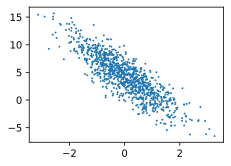

In [205]:
d2l.set_figsize()
# The semicolon is for displaying the plot only
d2l.plt.scatter(features[:, (1)].detach().numpy(),
                labels.detach().numpy(), 1);


### Reading the Dataset

Recall that training models consists of making multiple passes over the dataset, grabbing one minibatch of examples at a time, and using them to update our model. Since this process is so fundamental to training machine learning algorithms, it is worth defining a utility function to shuffle the dataset and access it in minibatches.

In the following code, we define the data_iter function to demonstrate one possible implementation of this functionality. The function takes a batch size, a matrix of features, and a vector of labels, yielding minibatches of the size batch_size. Each minibatch consists of a tuple of features and labels.

In [206]:
def data_iter(batch_size, features, labels):
    """
    Return (X, y) of shape (batch_size, d), (batch_size, 1)
    """
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = indices[i:min(i+batch_size, num_examples)]
        yield features[batch_indices], labels[batch_indices]

In [207]:
batch_size = 256

for X, y in data_iter(batch_size, features, labels):
    print (X.shape, y.shape)

torch.Size([256, 2]) torch.Size([256, 1])
torch.Size([256, 2]) torch.Size([256, 1])
torch.Size([256, 2]) torch.Size([256, 1])
torch.Size([232, 2]) torch.Size([232, 1])


In [208]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-1.1607,  1.1842],
        [ 0.3686, -0.7160],
        [ 1.0556,  1.8085],
        [ 0.6884, -0.8803],
        [ 0.2139,  2.4363],
        [-0.8887, -0.3942],
        [-0.2344, -0.7447],
        [ 0.2928,  1.1706],
        [-0.6994, -1.1594],
        [-1.8708,  0.4207]]) 
 tensor([[-2.1534],
        [ 7.3563],
        [ 0.1400],
        [ 8.5610],
        [-3.6583],
        [ 3.7831],
        [ 6.2697],
        [ 0.8171],
        [ 6.7402],
        [-1.0022]])


As we run the iteration, we obtain distinct minibatches successively until the entire dataset has been exhausted (try this). While the iteration implemented above is good for didactic purposes, it is inefficient in ways that might get us in trouble on real problems. For example, it requires that we load all the data in memory and that we perform lots of random memory access. The built-in iterators implemented in a deep learning framework are considerably more efficient and they can deal with both data stored in files and data fed via data streams.



### Initializing Model Parameters

Before we can begin optimizing our model’s parameters by minibatch stochastic gradient descent, we need to have some parameters in the first place. In the following code, we initialize weights by sampling random numbers from a normal distribution with mean 0 and a standard deviation of 0.01, and setting the bias to 0.



In [209]:
w = torch.normal(mean=0, std=0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

print (w)
print (b)

tensor([[-0.0056],
        [ 0.0040]], requires_grad=True)
tensor([0.], requires_grad=True)


After initializing our parameters, our next task is to update them until they fit our data sufficiently well. Each update requires taking the gradient of our loss function with respect to the parameters. Given this gradient, we can update each parameter in the direction that may reduce the loss.

Since nobody wants to compute gradients explicitly (this is tedious and error prone), we use automatic differentiation, as introduced in Section 2.5, to compute the gradient.

### Defining the Model

Next, we must define our model, relating its inputs and parameters to its outputs. Recall that to calculate the output of the linear model, we simply take the matrix-vector dot product of the input features $\mathbf{X}$ and the model weights $\mathbf{w}$ nd add the offset  b  to each example.

Note that below $\mathbf{Xw}$ is a vector and  b  is a scalar. Recall the broadcasting mechanism as described in Section 2.1.3. When we add a vector and a scalar, the scalar is added to each component of the vector.

In [210]:
def linreg(X, w, b):  #@save
    """The linear regression model."""
    return torch.matmul(X, w) + b #### X.w : Nx2 . 2x1 : Nx1

linreg(X, w, b).shape

torch.Size([10, 1])

### Defining the Loss Function

Since updating our model requires taking the gradient of our loss function, we ought to define the loss function first. Here we will use the squared loss function as described in Section 3.1. In the implementation, we need to transform the true value y into the predicted value’s shape y_hat. The result returned by the following function will also have the same shape as y_hat.

In [211]:
def squared_loss(y_hat, y):
    return 0.5*(y_hat - y.reshape(y_hat.shape))**2

### Defining the Optimization Algorithm

As we discussed in Section 3.1, linear regression has a closed-form solution. However, this is not a book about linear regression: it is a book about deep learning. Since none of the other models that this book introduces can be solved analytically, we will take this opportunity to introduce your first working example of minibatch stochastic gradient descent.

At each step, using one minibatch randomly drawn from our dataset, we will estimate the gradient of the loss with respect to our parameters. Next, we will update our parameters in the direction that may reduce the loss. The following code applies the minibatch stochastic gradient descent update, given a set of parameters, a learning rate, and a batch size. The size of the update step is determined by the learning rate lr. Because our loss is calculated as a sum over the minibatch of examples, we normalize our step size by the batch size (batch_size), so that the magnitude of a typical step size does not depend heavily on our choice of the batch size.

In [212]:
def sgd(params, lr, batch_size):

    with torch.no_grad():
        for param in params:
            param -= lr * param.grad/batch_size
            param.grad.zero_()

### Training

Now that we have all of the parts in place, we are ready to implement the main training loop. It is crucial that you understand this code because you will see nearly identical training loops over and over again throughout your career in deep learning.

In each iteration, we will grab a minibatch of training examples, and pass them through our model to obtain a set of predictions. After calculating the loss, we initiate the backwards pass through the network, storing the gradients with respect to each parameter. Finally, we will call the optimization algorithm sgd to update the model parameters.

In summary, we will execute the following loop:

1. Init params $(\mathbf{w}, b)$
2. Repeat until done
    2.1 Compute gradient $\mathbf{g} \leftarrow \partial_{(\mathbf{w},b)} \frac{1}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} l(\mathbf{x}^{(i)}, y^{(i)}, \mathbf{w}, b)$
    2.2 Update parameters $(\mathbf{w}, b) \leftarrow (\mathbf{w}, b) - \eta \mathbf{g}$

In each epoch, we will iterate through the entire dataset (using the data_iter function) once passing through every example in the training dataset (assuming that the number of examples is divisible by the batch size). The number of epochs num_epochs and the learning rate lr are both hyperparameters, which we set here to 3 and 0.03, respectively. 

In [218]:
lr = 0.03
num_epochs = 3
net = linreg ### network
loss = squared_loss

In [219]:
def synthetic_data(w, b, num_examples):
    """
    Generate y = Xw + b + noise.
    Return features: shape (num_examples, w)
    labels : shape (num_examples)
    """
    X = torch.normal(mean=0, std=1, size=(num_examples, len(w)))
    print (X.shape)
    y = torch.matmul(X, w) + b
    print (y.shape)
    ### add noise
    y += torch.normal(mean=0, std=0.01, size=y.shape)
    return X, y.reshape((-1, 1))

def data_iter(batch_size, features, labels):
    """
    Return (X, y) of shape (batch_size, d), (batch_size, 1)
    """
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = indices[i:min(i+batch_size, num_examples)]
        yield features[batch_indices], labels[batch_indices]

def linreg(X, w, b):  #@save
    """The linear regression model."""
    return torch.matmul(X, w) + b #### X.w : Nx2 . 2x1 : Nx1

def squared_loss(y_hat, y):
    return 0.5*(y_hat - y.reshape(y_hat.shape))**2


def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad/batch_size
            param.grad.zero_()


true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)
w = torch.normal(mean=0, std=0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

torch.Size([1000, 2])
torch.Size([1000])


#### Analytical verison of the diff of L wrt w

Let us see how the update to w will be analytically

![](https://i.imgur.com/KCmUlE7.jpg)

In [215]:
def analytical_grad_L_wrt_w(X, w, b, y):
    print (X.shape, w.shape, b, y.shape)
    print(torch.matmul(X.T, torch.matmul(X, w) + b - y))

In [216]:
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size=batch_size, features=features, labels=labels):
        print (X.shape, y.shape)
        y_hat = net(X, w, b)
        # -print (y_hat.shape)
        l = loss(y_hat, y) # Minibatch loss in `X` and `y`: shape is (mini_batch, 1)
        print (l.shape)
        l = l.sum()
        print (l.shape)
        l.backward() ### now we have access to w.grad and b.grad
        print (w.grad)
        print (b.grad.shape)
        w_grad = analytical_grad_L_wrt_w(X, w, b, y)
        break
    break
            

torch.Size([10, 2]) torch.Size([10, 1])
torch.Size([10, 1])
torch.Size([])
tensor([[-34.4014],
        [ 50.5581]])
torch.Size([1])
torch.Size([10, 2]) torch.Size([2, 1]) tensor([0.], requires_grad=True) torch.Size([10, 1])
tensor([[-34.4014],
        [ 50.5581]], grad_fn=<MmBackward>)


So the analytical calculation matches with the `backward` method
We need to sum up the elements of `l` vector here as we need to compute gradient for a scalar, we cant compute it for a vector. We can compute it wrt to a vector thought as we have done here (wrt w)

In [220]:
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # Minibatch loss in `X` and `y`
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # Update parameters using their gradient
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.036718
epoch 2, loss 0.000134
epoch 3, loss 0.000051


In [222]:
print (true_w, true_b)
print (w, b)

tensor([ 2.0000, -3.4000]) 4.2
tensor([[ 2.0003],
        [-3.3996]], requires_grad=True) tensor([4.1990], requires_grad=True)


Note that we should not take it for granted that we are able to recover the parameters perfectly. However, in machine learning, we are typically less concerned with recovering true underlying parameters, and more concerned with parameters that lead to highly accurate prediction. Fortunately, even on difficult optimization problems, stochastic gradient descent can often find remarkably good solutions, owing partly to the fact that, for deep networks, there exist many configurations of the parameters that lead to highly accurate prediction.

